# Logprobs

In [1]:
%pip install -qU openai matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
from openai import OpenAI
from math import exp
import numpy as np
from IPython.display import display, HTML

client = OpenAI()

In [16]:
from pydantic import BaseModel

class Animal(BaseModel):
    animal: str

print(Animal.model_json_schema())

{'properties': {'animal': {'title': 'Animal', 'type': 'string'}}, 'required': ['animal'], 'title': 'Animal', 'type': 'object'}


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_percentage_probs_log_scale_highlight_whitespace_bg(completion, mask_array=None, plot_id=None, prompt=None):
    # Extracting the logprobs and corresponding tokens
    logprobs_data = completion.choices[0].logprobs.content[0].top_logprobs
    
    # Extract tokens and logprobs
    tokens = [item.token for item in logprobs_data]
    logprobs = np.array([item.logprob for item in logprobs_data])
    
    # Convert logprobs to probabilities (exponentiate) and normalize to get percentages
    probs = np.exp(logprobs)
    percentages = 100 * probs / probs.sum()

    # Plotting the percentage probabilities on a log scale
    plt.figure(figsize=(10, 6))
    
    # If mask_array is provided, use it to grey out the invalid options
    if mask_array is None:
        mask_array = [True] * len(tokens)  # Default: All valid
    
    colors = ['grey' if not valid else 'blue' for valid in mask_array]
    
    bars = plt.barh(range(len(tokens)), percentages, color=colors)
    plt.xlabel('Percentage Probability (%)')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
    plt.yticks([])
    
    # Highlight tokens with whitespace by setting a background color
    ax = plt.gca()
    for i, (bar, token, valid) in enumerate(zip(bars, tokens, mask_array)):
        if token.startswith(' '):
            token = f' {token}'
        if token.endswith(' '):
            token = f'{token} '
        
        text_color = 'grey' if not valid else 'black'
        bg_color = 'none' if not valid else 'yellow'
        
        ax.text(
            percentages[i] + 0.01,  # Add a small offset to position the text
            bar.get_y() + bar.get_height()/2,  # Center the text on the bar
            f"{token}",
            va='center',
            ha='left',
            backgroundcolor=bg_color,  # Background color to highlight
            fontsize=10,
            color=text_color,
            bbox=dict(facecolor='lightblue' if valid else 'none', edgecolor='none', boxstyle='round,pad=0.2')
        )

    plt.title(f'Completion: {prompt}')
    plt.savefig(f'{plot_id}.png')

    plt.show()

In [13]:
def generate(sequence: str):
    return client.chat.completions.create(
        model="gpt-3.5-turbo",
        max_tokens=1,
        logprobs=True,
        top_logprobs=10,
        messages=[
            {"role": "system", "content": "What's the next word?"},
            {"role": "user", "content": sequence}
        ]
    )

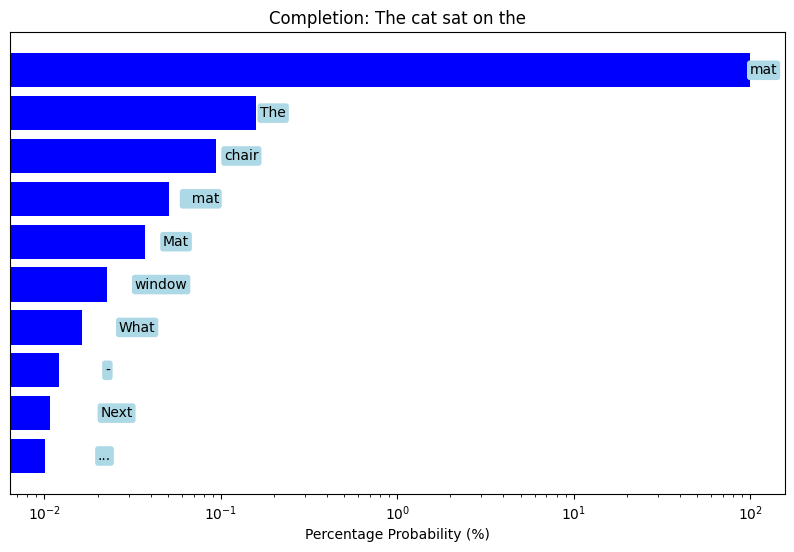

In [14]:
prompt = "The cat sat on the"
completion = generate(prompt)
# Plot the percentage probabilities on a log scale with highlighted whitespace tokens
plot_percentage_probs_log_scale_highlight_whitespace_bg(completion, None, 0, prompt)

In [2]:
def generate_json(sequence: str):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        max_tokens=1,
        logprobs=True,
        top_logprobs=10,
        messages=[
            {"role": "system", "content": "Complete the JSON without any preamble."},
            {"role": "user", "content": sequence}
        ]
    )
    plot_percentage_probs_log_scale_highlight_whitespace_bg(completion, None, 0, sequence)
    return completion

Now, let's try to generate a structured output in JSON

In [25]:
sequence_0 = '{"ani'
print(sequence_0)

{"ani


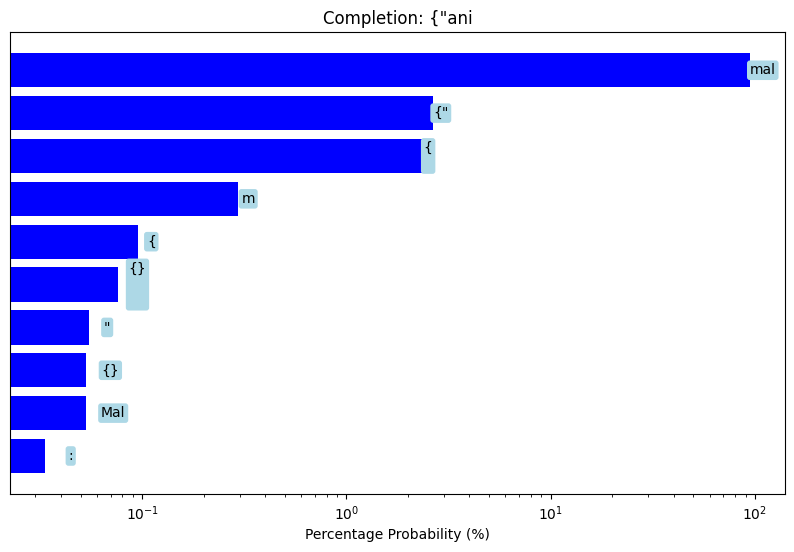

In [26]:
json_completion_1 = generate_json(sequence_0)

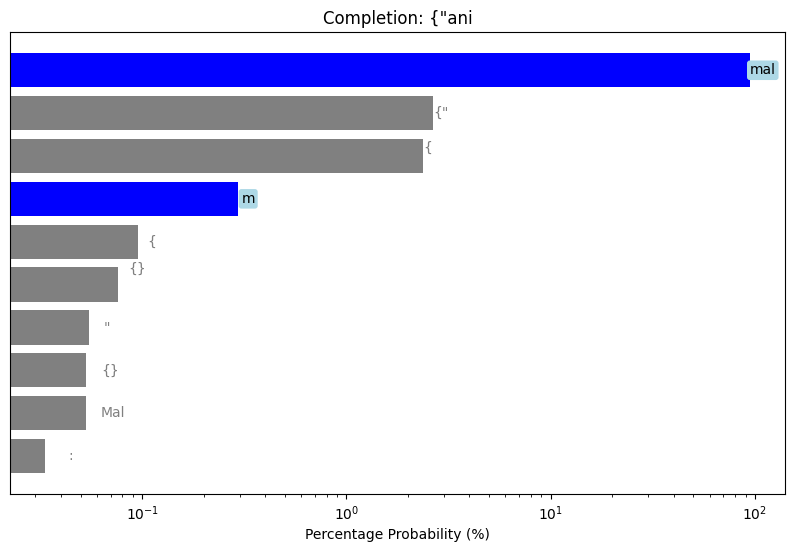

In [49]:
# True means valid, False means invalid
mask_array_1 = [True, False, False, True, False, False, False, False, False, False]

# Plot the percentage probabilities on a log scale with highlighted whitespace tokens
plot_percentage_probs_log_scale_highlight_whitespace_bg(json_completion_1, mask_array_1, 1, sequence_0)


In [30]:
sample_token_1 = 'mal'
sequence_1 = sequence_0 + sample_token_1
print(sequence_1)

{"animal


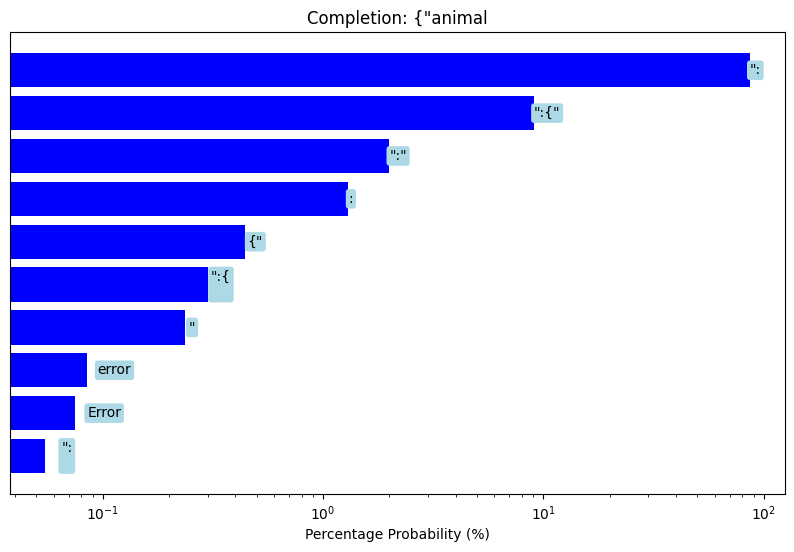

In [31]:
json_completion_2 = generate_json(sequence_1)

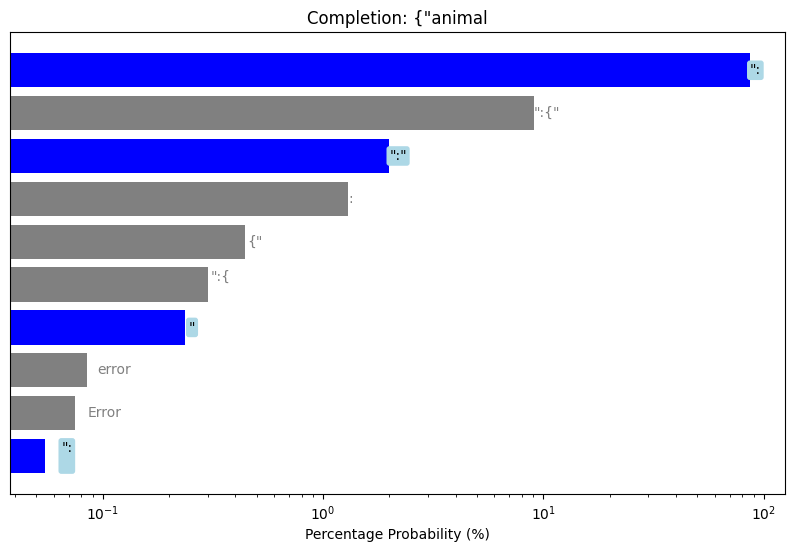

In [51]:
# True means valid, False means invalid
mask_array_2 = [True, False, True, False, False, False, True, False, False, True]

# Plot the percentage probabilities on a log scale with highlighted whitespace tokens
plot_percentage_probs_log_scale_highlight_whitespace_bg(json_completion_2, mask_array_2, 2, sequence_1)

In [33]:
sample_token_2 = '":'
sequence_2 = sequence_1 + sample_token_2
print(sequence_2)

{"animal":


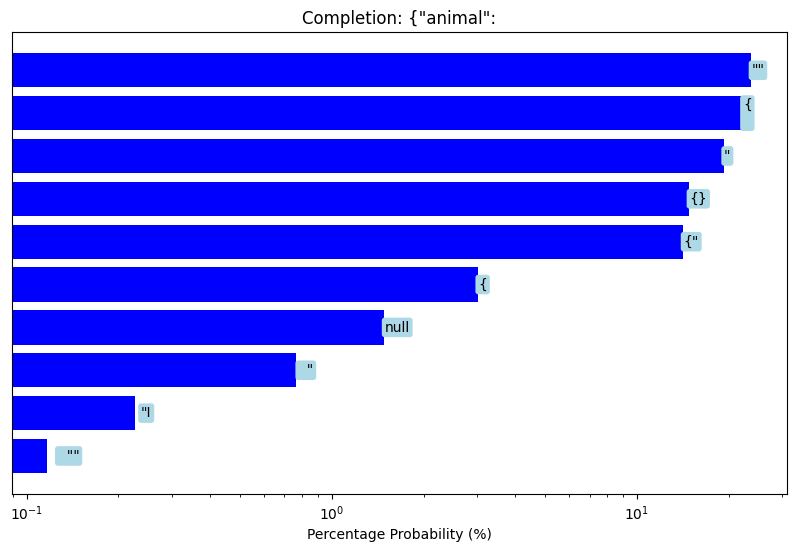

In [38]:
json_completion_3 = generate_json(sequence_2)

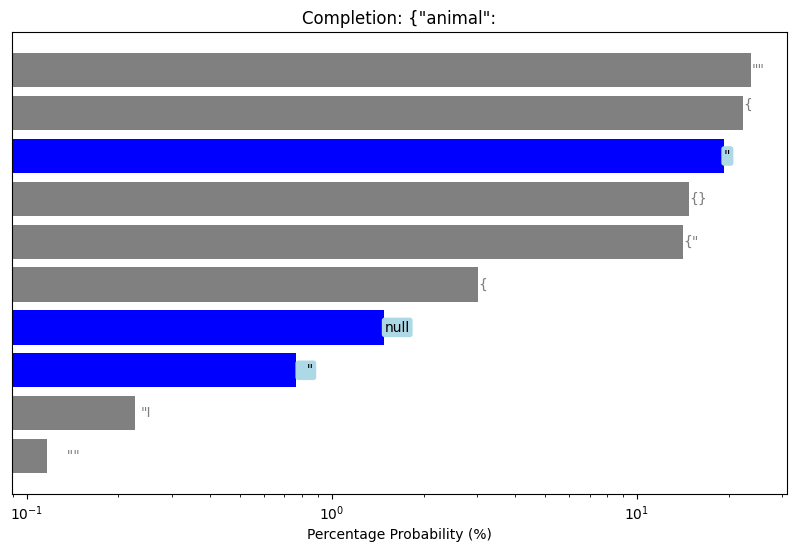

In [55]:
# True means valid, False means invalid
mask_array_3 = [False, False, True, False, False, False, True, True, False, False]

# Plot the percentage probabilities on a log scale with highlighted whitespace tokens
plot_percentage_probs_log_scale_highlight_whitespace_bg(json_completion_3, mask_array_3, 3, sequence_2)


In [40]:
sample_token_3 = '"'
sequence_3 = sequence_2 + sample_token_3
print(sequence_3)

{"animal":"


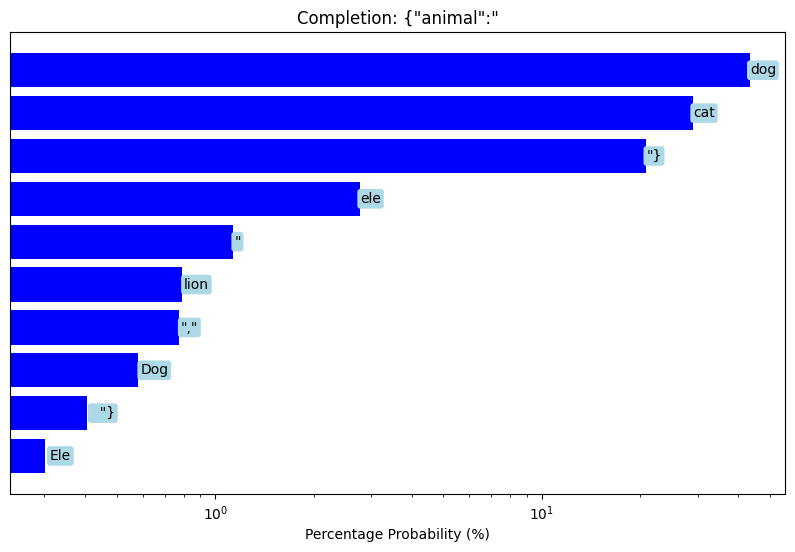

In [41]:
json_completion_4 = generate_json(sequence_3)

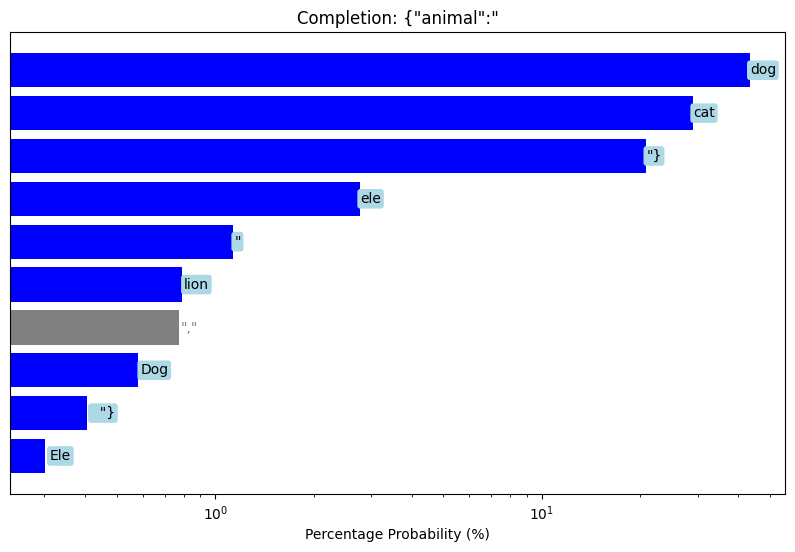

In [58]:
# True means valid, False means invalid
mask_array_4 = [True, True, True, True, True, True, False, True, True, True]

# Plot the percentage probabilities on a log scale with highlighted whitespace tokens
plot_percentage_probs_log_scale_highlight_whitespace_bg(json_completion_4, mask_array_4, 4, sequence_3)


In [ ]:
sample_token_4 = 'dog'
sequence_4 = sequence_3 + sample_token_4
print(sequence_4)

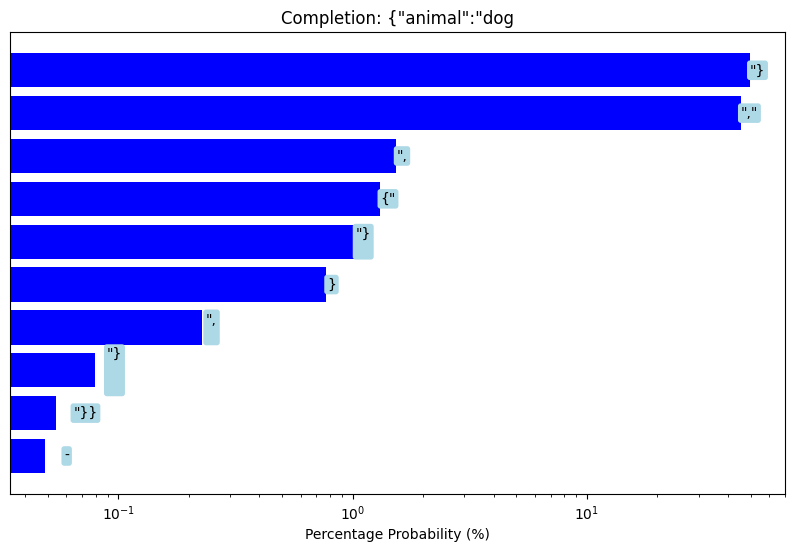

In [45]:
json_completion_5 = generate_json(sequence_4)

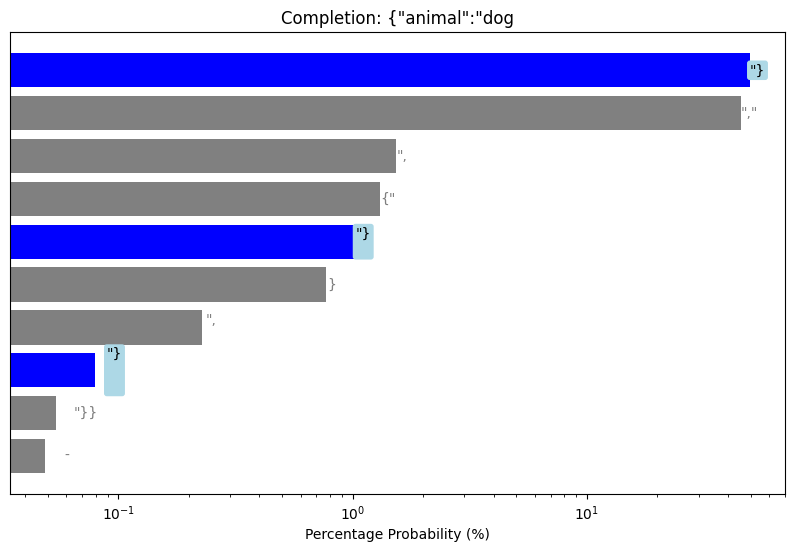

In [62]:
# True means valid, False means invalid
mask_array_5 = [True, False, False, False, True, False, False, True, False, False]

# Plot the percentage probabilities on a log scale with highlighted whitespace tokens
plot_percentage_probs_log_scale_highlight_whitespace_bg(json_completion_5, mask_array_5, 5, sequence_4)


In [12]:
sample_token_5 = '"}'
sequence_5 = sequence_4 + sample_token_5
print(sequence_5)

{"animal": "dog"}
